<a href="https://colab.research.google.com/github/mohamedghaly1/ML-Algorithms-for-Text-Image-Classification-and-Segmentation/blob/main/NB_EM_kNN_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

In [ ]:
import os
import spacy
import re
import json

In [ ]:
# Initialize an empty frequency table
positive_frequency_table = {}
negative_frequency_table = {}

# Function to update the frequency table
def update_frequency_table(word, frequency_table):
    # If the word is already in the table, increment its count
    if word in frequency_table:
        frequency_table[word] += 1
    # If the word is not in the table, add it with a frequency of 1
    else:
        frequency_table[word] = 1

# Display the frequency table
print(negative_frequency_table)

{}


In [ ]:
# Load the spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Path to the folder containing .txt files
folder_path = "aclImdb/train/pos"

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a .txt file
    if filename.endswith(".txt"):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)

        # Open and read the file
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()

            # Remove non-alphabetical characters and
            cleaned_text = re.sub(r'[^a-zA-Z\s]', '', content)

            # Convert to lowercase
            cleaned_text = cleaned_text.lower()

            # Process the text
            doc = nlp(cleaned_text)

            # print(doc.text)

            # Tokenize, remove stop words, and filter out spaces
            filtered_tokens = [token.text for token in doc if not token.is_stop and token.text.strip() != ""]

            for token in filtered_tokens:
                update_frequency_table(token, positive_frequency_table)

            # text_data.append(content)

In [ ]:
# Path to the folder containing .txt files
folder_path = "aclImdb/train/neg"

# List to store the content of all files
text_data = []

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a .txt file
    if filename.endswith(".txt"):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)

        # Open and read the file
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()

            # Remove non-alphabetical characters and
            cleaned_text = re.sub(r'[^a-zA-Z\s]', '', content)

            # Convert to lowercase
            cleaned_text = cleaned_text.lower()

            # Process the text
            doc = nlp(cleaned_text)

            # Tokenize, remove stop words, and filter out spaces
            filtered_tokens = [token.text for token in doc if not token.is_stop and token.text.strip() != ""]

            for token in filtered_tokens:
                update_frequency_table(token, negative_frequency_table)

            # text_data.append(content)

# Display the content of the first file (for example)
# print(negative_frequency_table[0])

In [ ]:
# File path to save the dictionary
file_path = "positive_frequency_table.json"

# Save the dictionary to a JSON file
with open(file_path, 'w') as file:
    json.dump(positive_frequency_table, file, indent=4)

print(f"Dictionary saved to {file_path}")

# File path to save the dictionary
file_path = "negative_frequency_table.json"

# Save the dictionary to a JSON file
with open(file_path, 'w') as file:
    json.dump(negative_frequency_table, file, indent=4)

print(f"Dictionary saved to {file_path}")

In [ ]:
# Function to preprocess and tokenize text
def preprocess_text(text):
    # Remove non-alphabetical characters and convert to lowercase
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    # Tokenize and remove stop words
    doc = nlp(cleaned_text)
    tokens = [token.text for token in doc if not token.is_stop and token.text.strip() != ""]
    return tokens

In [ ]:
total_negative_words = sum(negative_frequency_table.values())
total_positive_words = sum(positive_frequency_table.values())

print(total_negative_words)
print(total_positive_words)

# Function to calculate word probabilities
def calculate_word_probabilities(frequency_table, total_words):
    return {word: count / total_words for word, count in frequency_table.items()}

# Calculate P(word|positive) and P(word|negative)
P_word_given_negative = calculate_word_probabilities(negative_frequency_table, total_negative_words)
P_word_given_positive = calculate_word_probabilities(positive_frequency_table, total_positive_words)

In [ ]:
total_reviews = 25000

P_positive = 12500 / total_reviews
P_negative = 12500 / total_reviews

total_number_of_words = total_negative_words + total_positive_words

P_word_negative = calculate_word_probabilities(negative_frequency_table, total_number_of_words)
P_word_positive = calculate_word_probabilities(positive_frequency_table, total_number_of_words)


In [ ]:
# Function to predict the class of a new review
def predict_naive_bayes(review, P_positive, P_negative, P_word_given_positive, P_word_given_negative, P_word_positive, P_word_negative):
    # Preprocess the review
    tokens = preprocess_text(review)

    # Initialize probabilities
    log_prob_positive = 1
    log_prob_negative = 1

    doniminator_positive = 1
    doniminator_negative = 1

    for word in tokens:
        if word in P_word_positive:
            doniminator_positive *= P_word_positive[word]
        if word in P_word_negative:
            doniminator_negative *= P_word_negative[word]

    # Calculate log probabilities to avoid underflow
    for word in tokens:
        if word in P_word_given_positive:
            log_prob_positive *= P_word_given_positive[word]
            # print(P_word_given_positive[word])
        if word in P_word_given_negative:
            log_prob_negative *= P_word_given_negative[word]

    # Add log of class priors
    log_prob_positive *= P_positive
    log_prob_negative *= P_negative

    # last_positive = log_prob_positive / doniminator_positive
    # last_negative = log_prob_negative / doniminator_negative

    # print(log_prob_positive)
    # print(log_prob_negative)
    # Compare probabilities
    if log_prob_positive > log_prob_negative:
        return "positive"
    else:
        return "negative"

In [ ]:
i = 100

test_folder_path_pos = "aclImdb/test/pos"
test_folder_path_neg = "aclImdb/test/neg"

pred_pos = 0
pred_neg = 0

# Iterate over all files in the folder
for filename in os.listdir(test_folder_path_pos):
    # Check if the file is a .txt file
    if filename.endswith(".txt"):
        # Construct the full file path
        file_path = os.path.join(test_folder_path_pos, filename)

        # Open and read the file
        with open(file_path, 'r', encoding='utf-8') as file:
            new_review = file.read()

        prediction = predict_naive_bayes(new_review, P_positive, P_negative, P_word_given_positive, P_word_given_negative, P_word_positive, P_word_negative)
        if prediction == "positive":
            pred_pos += 1
        # print(f"Prediction: {prediction}")
    i -= 1
    if i == 0:
        break

i = 100

# Iterate over all files in the folder
for filename in os.listdir(test_folder_path_neg):
    # Check if the file is a .txt file
    if filename.endswith(".txt"):
        # Construct the full file path
        file_path = os.path.join(test_folder_path_neg, filename)

        # Open and read the file
        with open(file_path, 'r', encoding='utf-8') as file:
            new_review = file.read()

        prediction = predict_naive_bayes(new_review, P_positive, P_negative, P_word_given_positive, P_word_given_negative, P_word_positive, P_word_negative)
        if prediction == "negative":
            pred_neg += 1
        # print(f"Prediction: {prediction}")
    i -= 1
    if i == 0:
        break

accuracy = ((pred_pos + pred_neg) / 200) * 100
print(f"Accuracy: {accuracy}%")

In [ ]:
import pandas as pd

data = {
    "Category": ["Positive Reviews", "Negative Reviews", "Total Correct"],
    "Count": [pred_pos, pred_neg, pred_pos + pred_neg],
    "Accuracy (%)": [pred_pos / 100 * 100, pred_neg / 100 * 100, (pred_pos + pred_neg) / 200 * 100]
}

df = pd.DataFrame(data)

print(df)

# Task 2

In [ ]:
import os
import tarfile
import urllib.request
import glob

# Define the dataset URL and destination folder
dataset_url = "https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/segbench/BSDS300-images.tgz"
dataset_path = "./BSDS300-images.tgz"
extract_path = "/content/BSDS300-images.tgz"

# Download the dataset if it doesn't exist
if not os.path.exists(dataset_path):
    print("Downloading BSDS300 dataset...")
    urllib.request.urlretrieve(dataset_url, dataset_path)
    print("Download complete!")

dataset_path = "/content/BSDS300-images.tgz"
extract_path = "/content/BSDS300"

# Extract the dataset if it's not already extracted
if not os.path.exists(extract_path):
    print("Extracting dataset...")
    with tarfile.open(dataset_path, "r:gz") as tar:
        tar.extractall(path="/content/")  # Extract to /content/
    print("Extraction complete!")
else:
    print("Dataset already extracted.")



print("Extracted directories:", os.listdir("/content/BSDS300"))


# Get all image paths from train and test folders
color_image_paths = sorted(glob.glob("/content/BSDS300/images/train/*.jpg") +
                           glob.glob("/content/BSDS300/images/test/*.jpg"))

print(f"Found {len(color_image_paths)} color images.")

Dataset already extracted.
Extracted directories: ['images']
Found 292 color images.


Shape of train pixel_data (features): (35975433, 3)
Shape of train ground_truth (labels): (35975433,)
Shape of test pixel_data (features): (9109659, 3)
Shape of test ground_truth (labels): (9109659,)

First 5 RGB feature vectors:
 [[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 254 255]]

First 5 ground truth labels:
 [1 1 1 1 1]
Confusion Matrix:
 [[6015473  222438]
 [  53485 2818263]]


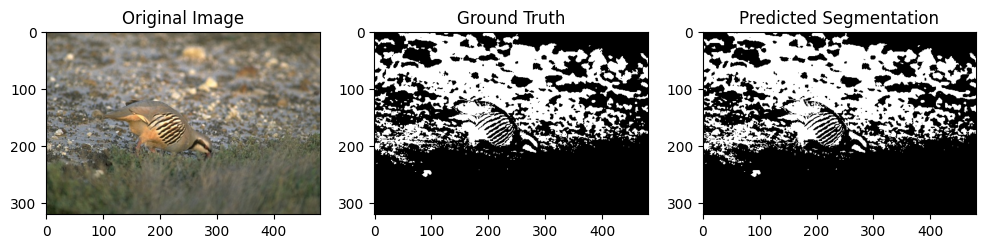

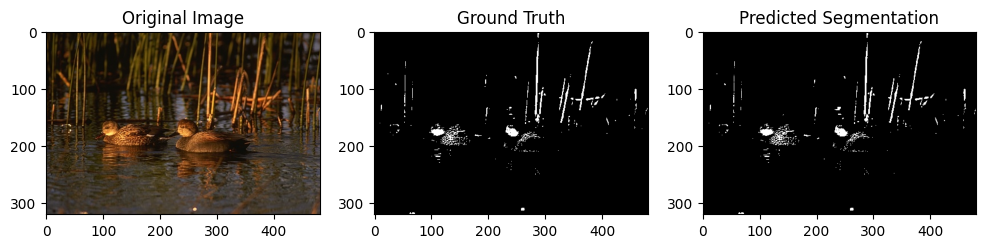

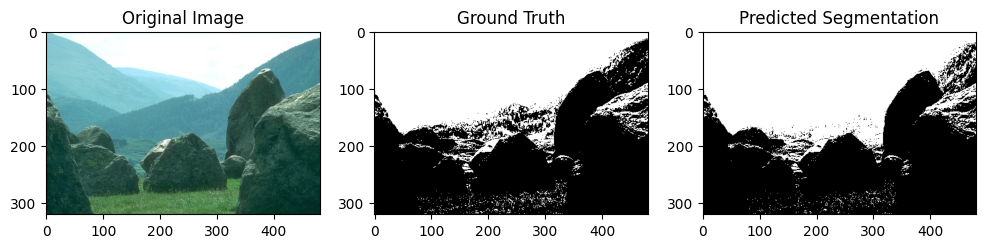

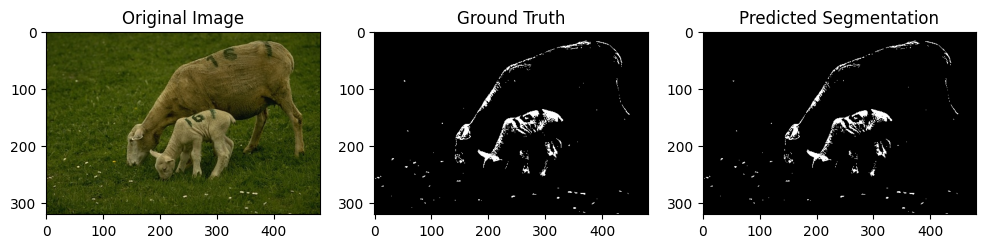

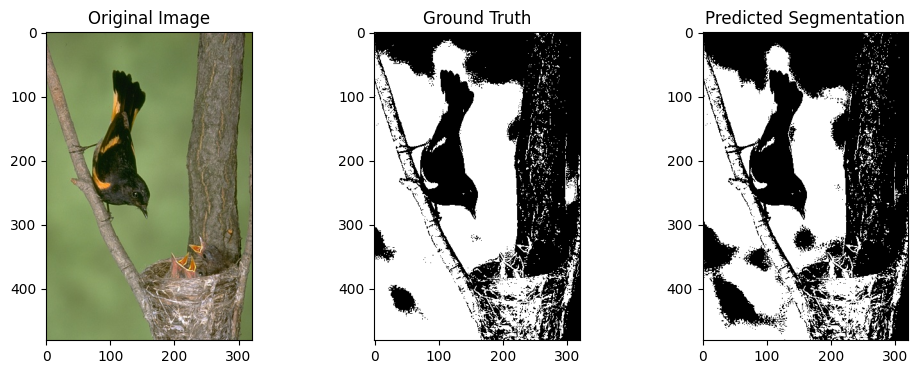

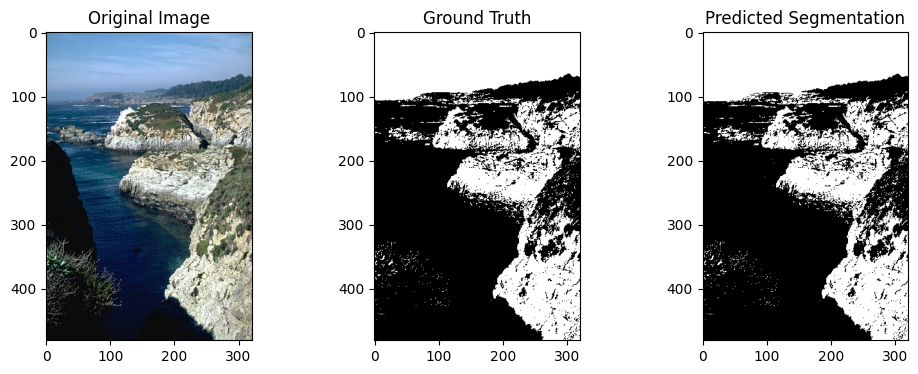

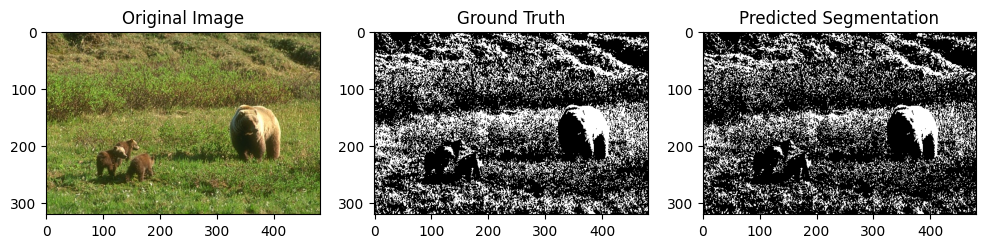

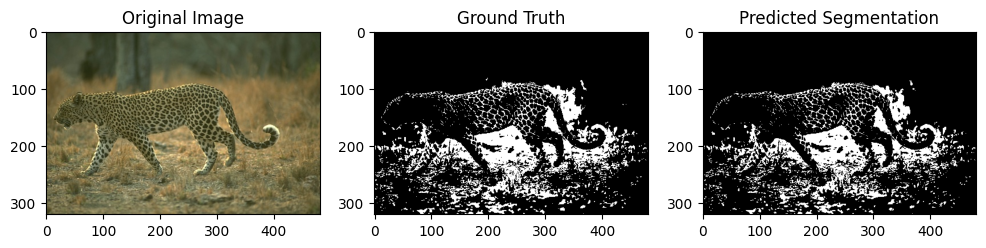

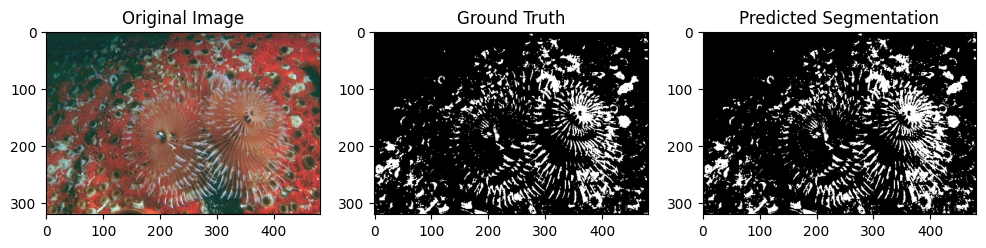

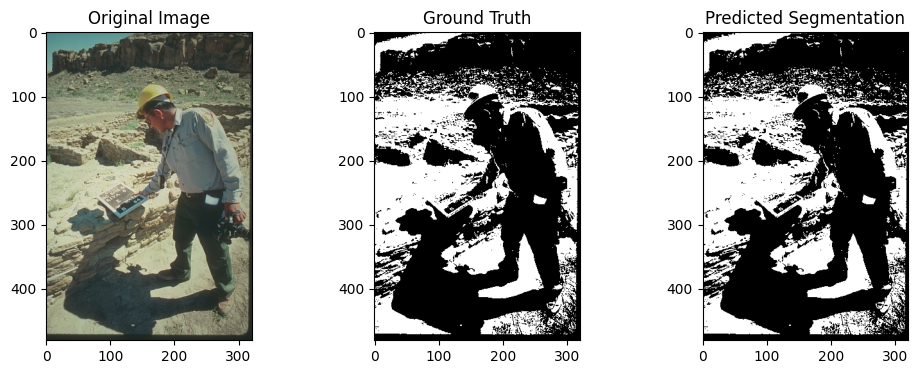

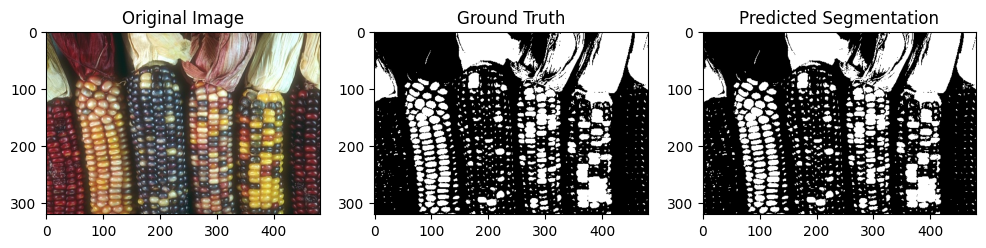

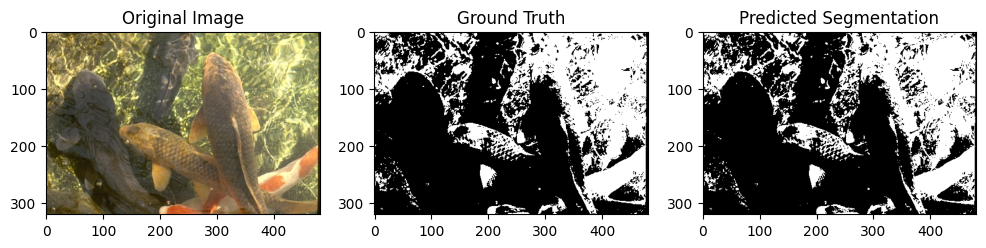

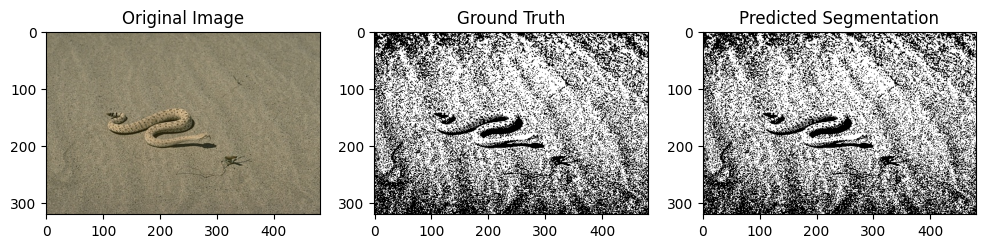

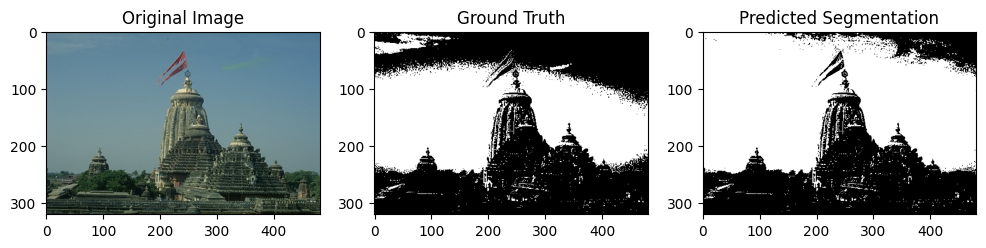

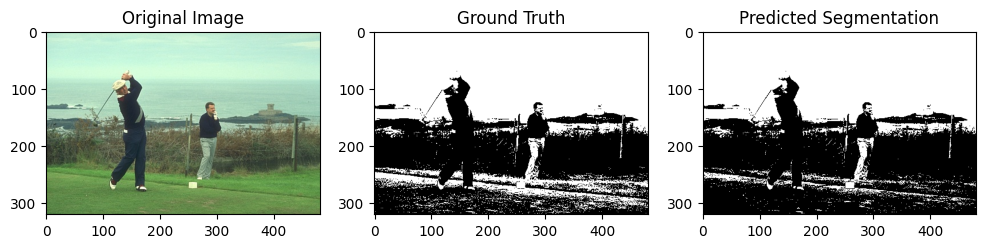

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def BayesModel(dta, gt):
    classes = np.unique(gt)# Get unique class labels (e.g., 0 and 1 for binary segmentation)
    # print(classes)
    model = {}

# Compute the mean, standard deviation, and prior probability for each class
    for c in classes:
        indices = np.where(gt == c)[0] # Find indices of pixels belonging to class 'c'
        class_data = dta[indices] # Extract RGB values of those pixels
        model[c] = {
            "mean": np.mean(class_data, axis=0),  # Mean RGB values for class 'c'
            "std": np.std(class_data, axis=0) + 1e-6, # Standard deviation (added small value to avoid division by zero)
            "prior": len(indices) / len(gt) # Prior probability of class 'c'
        }

    return model

def BayesPredict(BM, td):
    predictions = []

    for pixel in td: # Iterate over each pixel in test data
        probs = {} # Store posterior probabilities for each class
        for c, params in BM.items():
            mean, std, prior = params["mean"], params["std"], params["prior"]
            likelihood = np.exp(-((pixel - mean) ** 2) / (2 * std ** 2)) / (std) # Compute Gaussian likelihood using normal distribution formula
            probs[c] = np.prod(likelihood) * prior # Compute posterior probability (likelihood * prior)
        predictions.append(max(probs, key=probs.get)) # Assign class with the highest probability

    return np.array(predictions)

def ConfMtrx(gt, lbl):
    classes = np.unique(gt) # Get unique class labels
    matrix = np.zeros((len(classes), len(classes)), dtype=int) # Initialize confusion matrix


    for true, pred in zip(gt, lbl): # Iterate over true and predicted labels
        matrix[true, pred] += 1 # Increment the corresponding cell

    return matrix

def load_images(image_paths):
    pixel_data = [] # Store RGB pixel data
    labels = [] # Store ground truth labels

    for image_path in image_paths:
# Load color image
        color_img = cv2.imread(image_path)
        color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)
# Convert to grayscale
        gray_img = cv2.cvtColor(color_img, cv2.COLOR_RGB2GRAY)
# Binarize grayscale image (thresholding)
        _, binary_gt = cv2.threshold(gray_img, 128, 1, cv2.THRESH_BINARY)
# Flatten pixel data and ground truth labels
        pixels = color_img.reshape(-1, 3)
        ground_truth = binary_gt.flatten()
# Append to lists
        pixel_data.append(pixels)
        labels.append(ground_truth)
# Convert lists to NumPy arrays
    return np.vstack(pixel_data), np.concatenate(labels)

def main():
  # Split dataset into 80% training and 20% testing
    train_paths, test_paths = train_test_split(color_image_paths, test_size=0.2, random_state=42)
# Load training data (features & labels)
    dta, gt = load_images(train_paths)
    td, gt_test = load_images(test_paths)
# Print dataset shapes
    print("Shape of train pixel_data (features):", dta.shape)  #(total_pixels, 3)
    print("Shape of train ground_truth (labels):", gt.shape)  #(total_pixels,)

    print("Shape of test pixel_data (features):", td.shape)  #(total_pixels, 3)
    print("Shape of test ground_truth (labels):", gt_test.shape)  #(total_pixels,)
# Print some sample values
    print("\nFirst 5 RGB feature vectors:\n", dta[:5])
    print("\nFirst 5 ground truth labels:\n", gt[:5])

    # Train Naïve Bayes Model
    BM = BayesModel(dta, gt)

    # Predict on test set
    lbl = BayesPredict(BM, td)

    # Compute confusion matrix
    Mtrx = ConfMtrx(gt_test, lbl)
    print("Confusion Matrix:\n", Mtrx)

    # # Predict on entire image
    # full_pred = BayesPredict(BM, data).reshape(h, w)

    # Display results
    # for image_path in test_paths:
    for i, image_path in enumerate(test_paths[:15]):
        color_img = cv2.imread(image_path)
        color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

        # Convert to grayscale and binarize
        gray_img = cv2.cvtColor(color_img, cv2.COLOR_RGB2GRAY)
        _, binary_gt = cv2.threshold(gray_img, 128, 1, cv2.THRESH_BINARY)

        # Predict segmentation
        pixels = color_img.reshape(-1, 3)
        predicted_labels = BayesPredict(BM, pixels)
        segmented_img = predicted_labels.reshape(color_img.shape[:2])

        # Plot results
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(color_img)
        plt.title("Original Image")

        plt.subplot(1, 3, 2)
        plt.imshow(binary_gt, cmap="gray")
        plt.title("Ground Truth")

        plt.subplot(1, 3, 3)
        plt.imshow(segmented_img, cmap="gray")
        plt.title("Predicted Segmentation")

        plt.show()


if __name__ == "__main__":
    main()


# Task 3


## Apply EM from Scikit Learn Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from PIL import Image

In [ ]:
# Load the image
image = Image.open('stella.jpg')

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the image to [0, 1] range
# image_array = image_array / 255.0

# Reshape the image to a 2D array (pixels x color channels)
h, w, c = image_array.shape
image_2d = image_array.reshape(h * w, c)

In [ ]:
# Define the number of components (clusters)
n_components = 2  # You can change this based on your needs

# Fit the GMM model
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(image_2d)

# Predict the cluster for each pixel
labels = gmm.predict(image_2d)

In [ ]:
# Get the means of the two clusters
means = gmm.means_.flatten()

# Determine which label corresponds to the background (higher intensity)
background_label = np.argmax(means)

# Create a binary mask where background is 1 (white) and object is 0 (black)
binary_mask = (labels == background_label).astype(np.uint8)

# Invert the binary mask to make background white and object black
binary_mask = 1 - binary_mask

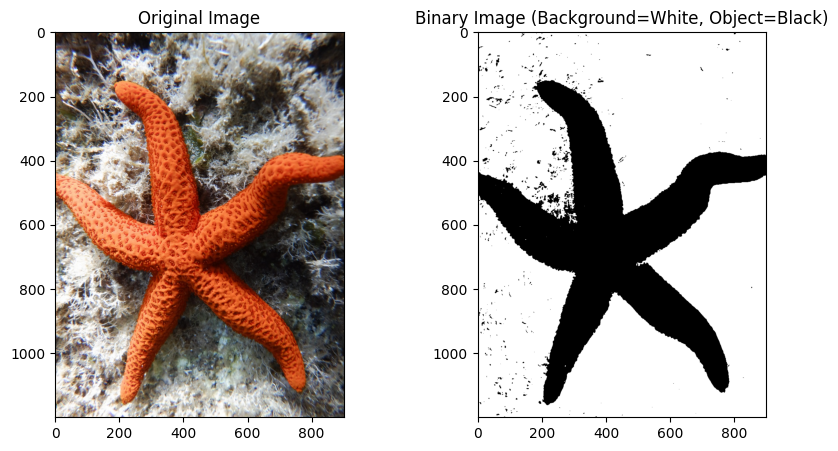

In [ ]:
# Reshape the binary mask back to the original image shape
binary_image = binary_mask.reshape(h, w)

# Display the original and binary image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image (Background=White, Object=Black)')

plt.show()

## Implement EM from scratch

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [ ]:
# Load the color image
image = cv2.imread('stella.jpg')  # Replace 'image.jpg' with your image file
image = cv2.resize(image, (256, 256))  # Resize for faster processing
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
data = image_rgb.reshape(-1, 3)  # Reshape to (N, 3) where N is the number of pixels
N, D = data.shape  # Number of pixels and dimensions (3 for RGB)

In [ ]:
# Initialize parameters for GMM (2 components: foreground and background)
K = 2  # Number of clusters (foreground and background)
mu = np.array([[100, 100, 100], [200, 200, 200]])  # Initial means for the two Gaussians
sigma = np.array([np.eye(3) * 100, np.eye(3) * 100])  # Initial covariance matrices
pi = np.array([0.5, 0.5])  # Initial mixing coefficients
max_iter = 100  # Maximum number of iterations
tolerance = 1e-5  # Convergence threshold

In [ ]:
# EM Algorithm
log_likelihood_prev = 0
for iteration in range(max_iter):
    # E-Step: Compute responsibilities (gamma)
    gamma = np.zeros((N, K))
    for k in range(K):
        gamma[:, k] = pi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=sigma[k])
    gamma /= gamma.sum(axis=1, keepdims=True)  # Normalize responsibilities

    # M-Step: Update parameters
    Nk = gamma.sum(axis=0)  # Effective number of points in each cluster
    pi = Nk / N  # Update mixing coefficients
    for k in range(K):
        mu[k] = np.dot(gamma[:, k], data) / Nk[k]  # Update means
        diff = data - mu[k]
        sigma[k] = np.dot(gamma[:, k] * diff.T, diff) / Nk[k]  # Update covariance matrices

    # Compute log-likelihood to check for convergence
    log_likelihood = np.sum(np.log(np.sum([pi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=sigma[k]) for k in range(K)], axis=0)))
    if np.abs(log_likelihood - log_likelihood_prev) < tolerance:
        break
    log_likelihood_prev = log_likelihood

# Assign each pixel to the cluster with the highest responsibility
labels = np.argmax(gamma, axis=1)
segmented_image = labels.reshape(image.shape[:2])  # Reshape labels back to the original image shape

# Create binary masks for foreground and background
foreground = np.zeros_like(image_rgb)
background = np.zeros_like(image_rgb)
foreground[segmented_image == 1] = image_rgb[segmented_image == 1]  # Foreground pixels
background[segmented_image == 0] = image_rgb[segmented_image == 0]  # Background pixels

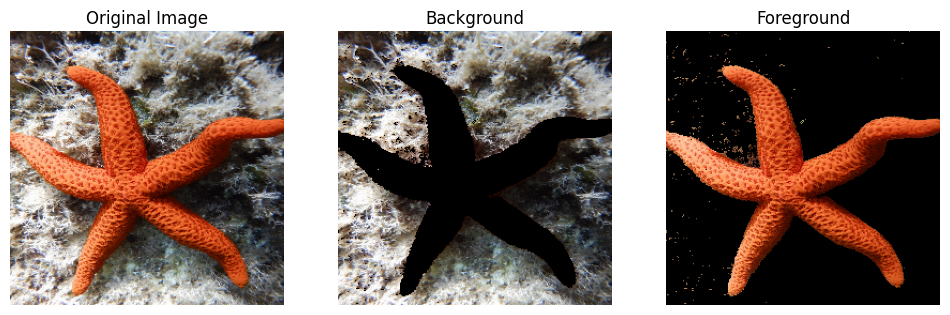

In [ ]:
# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(foreground)
plt.title('Background')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(background)
plt.title('Foreground')
plt.axis('off')

plt.show()

# Task 4

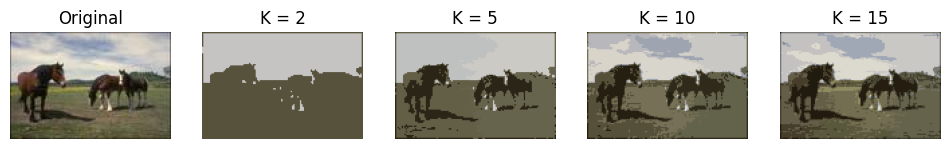

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# randomly select k initial centroids from the data
def select_initial_centroids(X, k):
    return X[np.random.choice(len(X), k, replace=False)]

# Euclidean distance from each point to each centroid
def calculate_distances(X, centroids):
    return np.sqrt(((X[:, np.newaxis] - centroids) ** 2).sum(axis=2))

# assign each pixel to the nearest centroid
def determine_clusters(distances):
    return np.argmin(distances, axis=1)

# update centroids by computing the mean of assigned points
def recalculate_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) if np.any(labels == i) else X[np.random.randint(len(X))] for i in range(k)])

# Main function to implement K-Means clustering from scratch
def apply_kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = select_initial_centroids(X, k)  # Initialize centroids randomly

    for _ in range(max_iters):
        distances = calculate_distances(X, centroids)  # Compute distances from points to centroids
        labels = determine_clusters(distances)  # Assign each point to the closest centroid
        new_centroids = recalculate_centroids(X, labels, k)  # Update centroids based on cluster assignments

        if np.linalg.norm(new_centroids - centroids) < tol:
            break  # Stop if centroids do not change significantly

        centroids = new_centroids  # Update centroids for next iteration

    return labels, centroids

# extract RGB and features from an image
def get_image_features(image):
    h, w, c = image.shape  # Get image dimensions
    X = np.zeros((h * w, 5))  # Each pixel represented as (R, G, B, x, y)

    for i in range(h):
        for j in range(w):
            X[i * w + j] = np.hstack((image[i, j], [i, j]))  # Combine RGB and spatial info

    return X, h, w, c

# perform image segmentation using K-Means clustering
def process_segmentation(image_path, k_values):
    image = cv2.imread(image_path)  # Load image from file
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB format
    X, h, w, c = get_image_features(image)  # Extract features from image

    results = {"Original": image}  # Store original image

    for k in k_values:
        labels, centroids =     (X, k)  # Perform K-Means clustering

        # Create segmented image based on cluster assignments
        segmented_image = centroids[labels][:, :3].reshape(h, w, c).astype(np.uint8)
        results[f'K = {k}'] = segmented_image  # Store segmented images

    return results

# display the original and segmented images
def visualize_results(results):
    plt.figure(figsize=(12, 6))  # Set figure size
    for i, (title, img) in enumerate(results.items()):
        plt.subplot(1, len(results), i + 1)  # Create subplots for each image
        plt.imshow(img)  # Display image
        plt.title(title)  # Add title
        plt.axis('off')  # Hide axes
    plt.show()

# Test the function with different k values
image_path = '/content/sample_data/horse.jpg'  # Replace with your image path
k_values = [2, 5, 10, 15]  # List of k values to test
results = process_segmentation(image_path, k_values)  # Perform segmentation
visualize_results(results)  # Display results


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Task 5

In [ ]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

# Download and load CIFAR-100 dataset
transform = transforms.Compose([transforms.ToTensor()])
cifar100_trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
cifar100_testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Get class labels from CIFAR-100
cifar100_labels = cifar100_trainset.classes
print(cifar100_labels)


# Find indices for "elephant" and "bus"
elephant_idx = cifar100_labels.index("elephant")
bus_idx = cifar100_labels.index("bus")

def filter_dataset(dataset, class_indices):
    images, labels = [], []
    for img, label in dataset:
        if label in class_indices:
            images.append(img.numpy())  # Convert tensor to NumPy array
            labels.append(label)

    return np.array(images), np.array(labels)

# Extract images of elephants and buses
train_images, train_labels = filter_dataset(cifar100_trainset, [elephant_idx, bus_idx])
test_images, test_labels = filter_dataset(cifar100_testset, [elephant_idx, bus_idx])

print(f"Train set size: {len(train_images)}, Test set size: {len(test_images)}")

100%|██████████| 169M/169M [00:01<00:00, 99.8MB/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 't

In [ ]:
import numpy as np
from collections import Counter

def extract_features(images):

    # Extracts features by dividing each image into 4x4 blocks and calculating mean RGB values.

    feature_vectors = []
    for img in images:
        img = np.transpose(img, (1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
        h, w, c = img.shape
        block_size = h // 4  # Assuming square images
        features = []

        for i in range(4):
            for j in range(4):
                block = img[i * block_size:(i + 1) * block_size, j * block_size:(j + 1) * block_size, :]
                mean_rgb = block.mean(axis=(0, 1))  # Mean across height & width
                features.extend(mean_rgb)

        feature_vectors.append(features)

    return np.array(feature_vectors)

def euclidean_distance(vec1, vec2):
    # Computes Euclidean distance between two vectors.
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

def knn_predict(test_features, train_features, train_labels, k=5):
    # Predicts labels for test images using KNN.

    predictions = []
    for test_vec in test_features:
        distances = [euclidean_distance(test_vec, train_vec) for train_vec in train_features]
        k_indices = np.argsort(distances)[:k]  # Get indices of k nearest neighbors
        k_labels = train_labels[k_indices]
        most_common = Counter(k_labels).most_common(1)[0][0]  # Majority vote
        predictions.append(most_common)
    return np.array(predictions)

def compute_accuracy(predictions, true_labels):
    # Computes accuracy of the classifier.
    return np.mean(predictions == true_labels)

# Extract features for training and testing sets
train_features = extract_features(train_images)
test_features = extract_features(test_images)

# Run KNN classifier with k=5
k = 5
predictions = knn_predict(test_features, train_features, train_labels, k)

# Compute accuracy
accuracy = compute_accuracy(predictions, test_labels)
print(f"KNN Classifier Accuracy: {accuracy * 100:.2f}%")

KNN Classifier Accuracy: 70.50%


Sample 1: True Label: Bus,	Predicted: Elephant
Sample 2: True Label: Bus,	Predicted: Bus
Sample 3: True Label: Elephant,	Predicted: Bus
Sample 4: True Label: Elephant,	Predicted: Elephant
Sample 5: True Label: Elephant,	Predicted: Elephant
Sample 6: True Label: Elephant,	Predicted: Elephant
Sample 7: True Label: Elephant,	Predicted: Elephant
Sample 8: True Label: Elephant,	Predicted: Bus
Sample 9: True Label: Elephant,	Predicted: Elephant
Sample 10: True Label: Bus,	Predicted: Elephant
Sample 11: True Label: Elephant,	Predicted: Elephant
Sample 12: True Label: Bus,	Predicted: Bus
Sample 13: True Label: Elephant,	Predicted: Elephant
Sample 14: True Label: Bus,	Predicted: Elephant
Sample 15: True Label: Elephant,	Predicted: Elephant
Sample 16: True Label: Bus,	Predicted: Elephant
Sample 17: True Label: Bus,	Predicted: Bus
Sample 18: True Label: Bus,	Predicted: Elephant
Sample 19: True Label: Elephant,	Predicted: Elephant
Sample 20: True Label: Elephant,	Predicted: Elephant
Sample 21: Tru

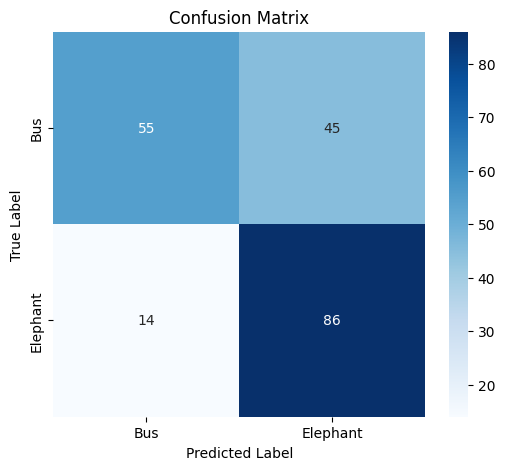

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Print 50 classification results
num_samples = 50
for i in range(min(num_samples, len(test_labels))):
    true_label = "Elephant" if test_labels[i] == 31 else "Bus"
    predicted_label = "Elephant" if predictions[i] == 31 else "Bus"
    print(f"Sample {i+1}: True Label: {true_label},\tPredicted: {predicted_label}")


# Compute confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Bus", "Elephant"], yticklabels=["Bus", "Elephant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
